In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
data='/data/gladyshev/mm1286/data/alz/gap/'

In [2]:
amyl=pd.read_csv(data+'IXICO/IXICO_PET_SUVR_NV_Data.csv')
amyl=amyl[['USUBJID','NVTESTCD','NVORRES']].pivot(index='USUBJID',columns='NVTESTCD',values='NVORRES').astype(float,errors='ignore')
amyl=amyl.dropna().drop('SQC',axis=1)
amyl['suvr']=amyl['SUVR'].astype(float)
amyl['amyl']=(amyl['AMYLOID']=='POSITIVE').astype(int)
amyl['amyl'].value_counts()

amyl
0    605
1    340
Name: count, dtype: int64

[Text(0, 0.5, 'ABeta42/40'), Text(0.5, 0, 'Amyloid Positive')]

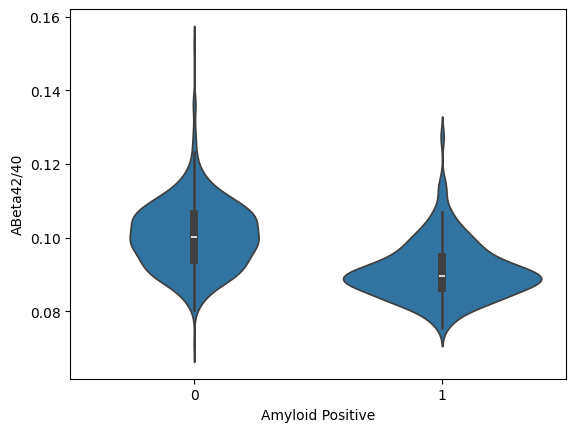

In [3]:
c2n=pd.read_csv(data+'C2N/C2N_Blood_Biomarker_LB_Data.csv')
c2n=c2n[['USUBJID','LBTESTCD','LBORRES']].pivot(index='USUBJID',columns='LBTESTCD',values='LBORRES').astype(float,errors='ignore')
c2n['ab40']=c2n['AMYLB40'].astype(float)
c2n['ab42']=c2n['AMYLB42'].astype(float)
c2n['ab4240']=c2n['ab42']/c2n['ab40']
c2n['c2n_ab']=c2n['AB4042'].astype(float)
c2n['c2n_aps']=c2n['APS'].astype(float)
c2n_q=pd.read_csv(data+'C2N/C2N_Blood_Biomarker_SUPPLB_Data.csv',index_col='USUBJID')['QVAL']
c2n_q=c2n_q[c2n_q=='N'].index
c2n['drop']=c2n.index.isin(c2n_q)
pl=amyl[['amyl']].join(c2n[['ab42','ab4240']])
pl.index=pl.index.str[11:]
ax=sns.violinplot(data=pl,x='amyl',y='ab4240')
ax.set(ylabel='ABeta42/40',xlabel='Amyloid Positive')

In [21]:
pl=pl.dropna()
model_formula = "amyl ~ ab4240"
pl['intercept'] = 1
model = sm.GLM.from_formula(model_formula, pl, family=sm.families.Binomial()).fit()
pl['pred'] = model.predict(pl)
print('AUC unadjusted unimputed: ', roc_auc_score(pl['amyl'], pl['pred']).round(3))

AUC unadjusted unimputed:  0.803
